In [3]:
# 와인 감별사 : 와인의 Quality를 분류하는 Classifier 만들기

## 1. 과제 설명
이번 과제에서는 케라스(Keras)를 활용하여, 와인의 품질을 분류하는 인공신경망 분류기를 만들어 볼 것입니다.
케라스는 Tensorflow, Theano 등의 딥 러닝 라이브러리 위에서 동작하는 오픈 소스 라이브러리로, 보다 쉬운 API를 제공함으로써 모델 설계 및 학습, 테스트가 간단하다는 장점이 있습니다. 

### 1.1 케라스 설치를 위한 필수 라이브러리
케라스를 설치하기 전에 먼저 필수적으로 설치해야 할 것들이 있습니다.
* Anaconda : Python 3.x 버전, Numpy, Pandas, SciPy, sklearn 등 필수 라이브러리들이 포함된 통합 배포 팩
<br> 아나콘다 설치 : https://www.anaconda.com/distribution/#download-section
* Tensorflow : Google에서 개발한 오픈 소스 딥 러닝 라이브러리. <b>설치된 Python 버전과 호환되는 것으로 설치할것!</b>
<br> 텐서플로우 설치 : https://www.tensorflow.org/install/pip
<br> * CPU 버전을 설치할 것을 권장. 

### 1.2 케라스 설치
위 라이브러리들을 설치한 후, 케라스를 설치합니다.
* https://keras.io/#installation

### 1.3 케라스 설치 확인
케라스가 올바르게 설치되었는지 확인하기 위해, 케라스를 Import한 뒤 버전을 출력해봅니다.


SyntaxError: invalid syntax (<ipython-input-3-ccc1ecde25f7>, line 4)

In [19]:
from tensorflow import keras

keras.__version__

'2.2.4-tf'

위와 같이 케라스의 버전이 출력되면 정상입니다. (출력되는 버전은 위 예시와 다를 수도 있음)<br> 나중에 신경망을 만들기 위한 클래스들도 함께 Import 합시다.

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras import optimizers
from keras import layers, models
import matplotlib.pyplot as plt


---
## 2. Data Set 설명
 본 과제에서 사용할 데이터 셋은 UCI에서 제공되는 Wine Quality Data Set입니다. (https://archive.ics.uci.edu/ml/datasets/Wine+Quality) 데이터는 레드 와인 1599개, 화이트 와인 4898개의 화학적 특성을 포함하고 있습니다. 데이터는 두 개의 CSV(Comma-seperated values)형태로 제공되며, 구성은 다음과 같습니다.
* 화이트 와인 / 레드 와인 CSV 파일
* 11개의 실수(Real) 입력 변수 (X)
    * fixed acidity
    * volatile acidity
    * citric acid
    * residual sugar
    * chlorides
    * free sulfur dioxide
    * total sulfur dioxide
    * density
    * pH
    * sulphates
    * alcohol
* 1개의 클래스 레이블 (Y)
   * quality (0~10, 0: Very poor, 10: Very excellent)
* Missing Value 없음
* 클래스들이 불균등하게 분포함.

더 자세한 사항은 블랙보드에 함께 올라가있는 설명 파일을 참고하도록 합시다.

### 2.1 데이터 로드
데이터 분석에서 가장 많이 사용되는 라이브러리 중 하나인 Pandas와 Numpy를 Import하겠습니다. Pandas는 데이터 분석에 유용한 데이터 타입인 DataFrame을 제공하며, Numpy는 효율적이고 빠른 매트릭스 연산을 지원합니다.

In [21]:
import pandas as pd
pd.__version__
pd.options.display.max_rows=15

In [22]:
import numpy as np
np.__version__
import os
print(os.getcwd())

C:\Users\HCI_seungchan\Jupyter\wine_classifier


Pandas를 이용해서 CSV 파일을 읽어들이도록 합시다. white_wine 변수에는 화이트 와인 데이터를, red_wine 변수에는 레드 와인 데이터를 읽어들입니다.

In [8]:
#########################코드########################


white_wine = pd.read_csv('./wine_data/winequality-white.csv')
red_wine = pd.read_csv('./wine_data/winequality-red.csv')



#####################################################

### 2.2 데이터 전처리
데이터를 읽어들인 뒤, 읽어들인 데이터프레임을 display 함수를 통해 확인합니다.

In [ ]:
display(white_wine)

In [ ]:
# print(red_wine.loc[0])
# display(red_wine)
red_wine.shape
# from keras import datasets
# (x,y),(x_, y_)  = datasets.mnist.load_data()
# print(type(x))

이제 데이터프레임을 입력 변수와 정답 셋(클래스 레이블)으로 나누는 함수를 작성하겠습니다.<br>
<b>generate_data</b>함수는 데이터프레임 객체와 테스트 셋 비율을 입력으로 받아, 네 개의 numpy array를 반환합니다. 트레이닝 셋과 테스트 셋의 비율은 training_set_ratio에 의해 결정됩니다.
* Function : generate_data
 * 입력
     * pd.DataFrame : df
     * double : training_set_ratio  
 * 출력
     * np.array : X_train
     * np.array : Y_train
     * np.array : X_test
     * np.array : Y_test
     


In [23]:
#####################################################
def normalize(total_data: np.array) -> None:
    for i in range(np.shape(total_data)[1]-1):
        col_zero_base = total_data[:,i] - total_data[:,i].min()
        total_data[:,i] = ( col_zero_base ) / ( col_zero_base.max() )

def generate_data(df: pd.DataFrame, t_r: float):
    total_data = df.to_numpy()
    normalize(total_data)

    np.random.shuffle(total_data)
    n_train_set = int(np.shape(total_data)[0] * t_r)

    x_train = total_data[:n_train_set, :-1]
    y_train = total_data[:n_train_set, -1:]

    x_test = total_data[n_train_set:, :-1]
    y_test = total_data[n_train_set:, -1:]

    return x_train, y_train, x_test, y_test
#####################################################

global one_hot_codes
one_hot_codes = []
def make_label():
    global one_hot_codes
    tmp = [0] * 10
    for i in range(10):
        tmp[i] = 1
        one_hot_codes.append(tmp.copy())
        tmp[i] = 0

def one_hot_enc(y_label: np.array) -> np.array:
    onehot_y = []
    for i in range(np.shape(y_label)[0]):
        idx = int(y_label[i][0])
        if(idx < 0 or idx > 9):
            print(idx)
        onehot_y.append(one_hot_codes[idx])
    
    onehot_y = np.array(onehot_y)
    return onehot_y

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'], loc=0)

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model acc')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'], loc=0)

In [10]:
make_label()
x_train, y_train, x_test, y_test = generate_data(white_wine, 0.8)
y_train = one_hot_enc(y_train)
y_test = one_hot_enc(y_test)

display(x_train)
display(y_train)

array([[0.25961538, 0.43137255, 0.10240964, ..., 0.49090909, 0.11627907,
        0.32258065],
       [0.27884615, 0.15686275, 0.21686747, ..., 0.56363636, 0.34883721,
        0.46774194],
       [0.45192308, 0.08823529, 0.44578313, ..., 0.50909091, 0.20930233,
        0.70967742],
       ...,
       [0.41346154, 0.41176471, 0.28313253, ..., 0.44545455, 0.23255814,
        0.46774194],
       [0.47115385, 0.2254902 , 0.43975904, ..., 0.21818182, 0.76744186,
        0.11290323],
       [0.35576923, 0.29411765, 0.3373494 , ..., 0.37272727, 0.5       ,
        0.30645161]])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

작성한 함수를 호출하여 화이트 와인 데이터에 대해 트레이닝 셋과 테스트 셋의 입력과 정답이 적절하게 생성되었는지 확인합니다.

---

# 3. 케라스를 이용한 모델 생성, 학습, 테스트
입력 데이터와 정답 셋이 만들어졌으니 케라스를 사용하여 각 데이터에 대한 분류기를 생성하고, 트레이닝 셋으로 학습시킨 뒤 테스트 정확도를 관찰합니다.

# 과제
### 1. 화이트 와인 분류 모델과 레드 와인 분류 모델 설계 및 학습
* 하나의 히든 레이어에 32개의 노드를 가진 인공신경망 모델 생성 및 모델 학습
* 트레이닝 Epoch에 따라 Loss의 변화를 그래프로 시각화
* 테스트 셋에 대한 정확도 기록

Train on 4157 samples, validate on 1040 samples
Epoch 1/500
4157/4157 [==============================] - 0s 52us/step - loss: 2.2434 - accuracy: 0.1496 - val_loss: 2.1582 - val_accuracy: 0.1000
Epoch 2/500
4157/4157 [==============================] - 0s 6us/step - loss: 2.0676 - accuracy: 0.4186 - val_loss: 1.9304 - val_accuracy: 0.5183
Epoch 3/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.8763 - accuracy: 0.4802 - val_loss: 1.6848 - val_accuracy: 0.5212
Epoch 4/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.6779 - accuracy: 0.4900 - val_loss: 1.4720 - val_accuracy: 0.4885
Epoch 5/500
4157/4157 [==============================] - 0s 7us/step - loss: 1.5151 - accuracy: 0.4879 - val_loss: 1.3368 - val_accuracy: 0.4788
Epoch 6/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.4134 - accuracy: 0.4638 - val_loss: 1.2643 - val_accuracy: 0.4375
Epoch 7/500
4157/4157 [==============================] - 0s 7us/step - loss: 1.35

Epoch 57/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.1077 - accuracy: 0.5352 - val_loss: 1.0259 - val_accuracy: 0.5760
Epoch 58/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.1071 - accuracy: 0.5319 - val_loss: 1.0257 - val_accuracy: 0.5740
Epoch 59/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.1063 - accuracy: 0.5343 - val_loss: 1.0289 - val_accuracy: 0.5644
Epoch 60/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.1060 - accuracy: 0.5299 - val_loss: 1.0271 - val_accuracy: 0.5654
Epoch 61/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.1051 - accuracy: 0.5362 - val_loss: 1.0267 - val_accuracy: 0.5740
Epoch 62/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.1047 - accuracy: 0.5304 - val_loss: 1.0276 - val_accuracy: 0.5663
Epoch 63/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.1039 - accuracy: 0.5376 - val_loss: 1.0279 -

4157/4157 [==============================] - 0s 6us/step - loss: 1.0824 - accuracy: 0.5405 - val_loss: 1.0102 - val_accuracy: 0.5760
Epoch 114/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0819 - accuracy: 0.5425 - val_loss: 1.0096 - val_accuracy: 0.5721
Epoch 115/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0819 - accuracy: 0.5410 - val_loss: 1.0087 - val_accuracy: 0.5721
Epoch 116/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0813 - accuracy: 0.5398 - val_loss: 1.0103 - val_accuracy: 0.5788
Epoch 117/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0820 - accuracy: 0.5393 - val_loss: 1.0106 - val_accuracy: 0.5788
Epoch 118/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0803 - accuracy: 0.5396 - val_loss: 1.0079 - val_accuracy: 0.5740
Epoch 119/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0801 - accuracy: 0.5420 - val_loss: 1.0084 - val_ac

Epoch 169/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0656 - accuracy: 0.5487 - val_loss: 0.9986 - val_accuracy: 0.5837
Epoch 170/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0656 - accuracy: 0.5490 - val_loss: 1.0002 - val_accuracy: 0.5827
Epoch 171/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0654 - accuracy: 0.5492 - val_loss: 1.0010 - val_accuracy: 0.5837
Epoch 172/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0651 - accuracy: 0.5487 - val_loss: 0.9983 - val_accuracy: 0.5750
Epoch 173/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0651 - accuracy: 0.5475 - val_loss: 0.9982 - val_accuracy: 0.5817
Epoch 174/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0647 - accuracy: 0.5478 - val_loss: 0.9980 - val_accuracy: 0.5788
Epoch 175/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0644 - accuracy: 0.5492 - val_loss: 0

Epoch 225/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0536 - accuracy: 0.5521 - val_loss: 0.9999 - val_accuracy: 0.5798
Epoch 226/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0531 - accuracy: 0.5504 - val_loss: 1.0000 - val_accuracy: 0.5808
Epoch 227/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0536 - accuracy: 0.5518 - val_loss: 1.0011 - val_accuracy: 0.5817
Epoch 228/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0534 - accuracy: 0.5530 - val_loss: 0.9991 - val_accuracy: 0.5808
Epoch 229/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0529 - accuracy: 0.5540 - val_loss: 0.9993 - val_accuracy: 0.5808
Epoch 230/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0526 - accuracy: 0.5499 - val_loss: 0.9997 - val_accuracy: 0.5788
Epoch 231/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0535 - accuracy: 0.5506 - val_loss: 1

Epoch 281/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0449 - accuracy: 0.5497 - val_loss: 1.0042 - val_accuracy: 0.5827
Epoch 282/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0439 - accuracy: 0.5523 - val_loss: 1.0022 - val_accuracy: 0.5856
Epoch 283/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0441 - accuracy: 0.5514 - val_loss: 1.0047 - val_accuracy: 0.5856
Epoch 284/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0435 - accuracy: 0.5540 - val_loss: 1.0030 - val_accuracy: 0.5798
Epoch 285/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0442 - accuracy: 0.5535 - val_loss: 1.0025 - val_accuracy: 0.5798
Epoch 286/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0433 - accuracy: 0.5576 - val_loss: 1.0018 - val_accuracy: 0.5846
Epoch 287/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0432 - accuracy: 0.5499 - val_loss: 1

Epoch 337/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0357 - accuracy: 0.5533 - val_loss: 1.0087 - val_accuracy: 0.5750
Epoch 338/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0360 - accuracy: 0.5547 - val_loss: 1.0078 - val_accuracy: 0.5750
Epoch 339/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0356 - accuracy: 0.5552 - val_loss: 1.0088 - val_accuracy: 0.5788
Epoch 340/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0354 - accuracy: 0.5540 - val_loss: 1.0092 - val_accuracy: 0.5750
Epoch 341/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0355 - accuracy: 0.5538 - val_loss: 1.0081 - val_accuracy: 0.5760
Epoch 342/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0360 - accuracy: 0.5528 - val_loss: 1.0086 - val_accuracy: 0.5769
Epoch 343/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0353 - accuracy: 0.5545 - val_loss: 1

Epoch 393/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0298 - accuracy: 0.5545 - val_loss: 1.0155 - val_accuracy: 0.5808
Epoch 394/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0299 - accuracy: 0.5557 - val_loss: 1.0162 - val_accuracy: 0.5692
Epoch 395/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0295 - accuracy: 0.5598 - val_loss: 1.0159 - val_accuracy: 0.5779
Epoch 396/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0298 - accuracy: 0.5552 - val_loss: 1.0144 - val_accuracy: 0.5769
Epoch 397/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0307 - accuracy: 0.5576 - val_loss: 1.0170 - val_accuracy: 0.5769
Epoch 398/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0291 - accuracy: 0.5547 - val_loss: 1.0159 - val_accuracy: 0.5740
Epoch 399/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0291 - accuracy: 0.5567 - val_loss: 1

Epoch 449/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0258 - accuracy: 0.5542 - val_loss: 1.0214 - val_accuracy: 0.5702
Epoch 450/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0247 - accuracy: 0.5535 - val_loss: 1.0213 - val_accuracy: 0.5712
Epoch 451/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0249 - accuracy: 0.5569 - val_loss: 1.0208 - val_accuracy: 0.5692
Epoch 452/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0253 - accuracy: 0.5607 - val_loss: 1.0223 - val_accuracy: 0.5760
Epoch 453/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0249 - accuracy: 0.5574 - val_loss: 1.0221 - val_accuracy: 0.5721
Epoch 454/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0247 - accuracy: 0.5586 - val_loss: 1.0202 - val_accuracy: 0.5721
Epoch 455/500
4157/4157 [==============================] - 0s 6us/step - loss: 1.0244 - accuracy: 0.5554 - val_loss: 1

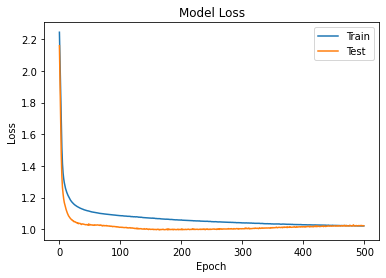

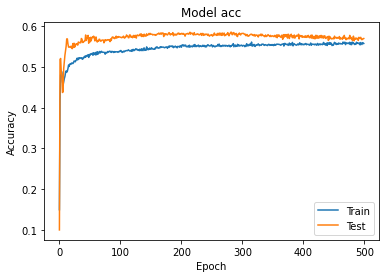

In [16]:
##########################################################
class ANN_classifier(models.Model):
    def __init__(self, n_in, n_h, n_out):
        hidden = layers.Dense(n_h)
        output = layers.Dense(n_out)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')

        x = layers.Input(shape=(n_in,))
        h = relu(hidden(x))
        y = softmax(output(h))

        super().__init__(x, y)
        self.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
        
n_in = 11
n_h = 32
n_out = 10
model = ANN_classifier(n_in, n_h, n_out)

history = model.fit(x_train, y_train, epochs=500,
                    batch_size=200, validation_split=0.2,
                    verbose=1)

performance_test = model.evaluate(x_test, y_test, batch_size=200)

print(f'\nTest Loss: {performance_test}')

plot_loss(history)
plt.show()
plot_acc(history)
plt.show()


###########################################################

### 2. 각 모델의 성능을 향상시킬 수 있는 방법 적용
* 하이퍼파라미터를 변경하여 테스트 셋에서의 정확도를 향상시킬 것
    * 예) 레이어 수, 노드 수, Learning rate 등
* 하이퍼파라미터를 변화시킨 각각의 모델에 대해, 트레이닝 Epoch 당 Loss의 변화를 기록하고 이를 시각화
* 그 외 성능을 향상시킬 수 있는 모든 방법을 사용하여 가장 성능이 좋은 모델을 선택
    * 예) Dropout, Normalization 등

Train on 3134 samples, validate on 784 samples
Epoch 1/1000
3134/3134 [==============================] - 0s 130us/step - loss: 3.3347 - accuracy: 0.0428 - val_loss: 0.5674 - val_accuracy: 0.2768
Epoch 2/1000
3134/3134 [==============================] - 0s 14us/step - loss: 0.8239 - accuracy: 0.2288 - val_loss: 0.4636 - val_accuracy: 0.3189
Epoch 3/1000
3134/3134 [==============================] - 0s 14us/step - loss: 0.6088 - accuracy: 0.2948 - val_loss: 0.6989 - val_accuracy: 0.1735
Epoch 4/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.4985 - accuracy: 0.3350 - val_loss: 0.4433 - val_accuracy: 0.3469
Epoch 5/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.4395 - accuracy: 0.3504 - val_loss: 0.4996 - val_accuracy: 0.3163
Epoch 6/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.4268 - accuracy: 0.3449 - val_loss: 0.3068 - val_accuracy: 0.4758
Epoch 7/1000
3134/3134 [==============================] - 0s 13us/step

3134/3134 [==============================] - 0s 13us/step - loss: 0.2162 - accuracy: 0.5217 - val_loss: 0.2087 - val_accuracy: 0.5778
Epoch 57/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.2235 - accuracy: 0.5195 - val_loss: 0.2190 - val_accuracy: 0.5638
Epoch 58/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.2160 - accuracy: 0.5274 - val_loss: 0.2066 - val_accuracy: 0.5740
Epoch 59/1000
3134/3134 [==============================] - 0s 12us/step - loss: 0.2137 - accuracy: 0.5329 - val_loss: 0.2334 - val_accuracy: 0.5485
Epoch 60/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.2181 - accuracy: 0.5265 - val_loss: 0.2085 - val_accuracy: 0.5485
Epoch 61/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.2187 - accuracy: 0.5361 - val_loss: 0.2521 - val_accuracy: 0.5332
Epoch 62/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.2221 - accuracy: 0.5258 - val_loss: 0.2378 -

3134/3134 [==============================] - 0s 13us/step - loss: 0.2123 - accuracy: 0.5392 - val_loss: 0.2185 - val_accuracy: 0.5523
Epoch 112/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.2056 - accuracy: 0.5475 - val_loss: 0.2020 - val_accuracy: 0.5816
Epoch 113/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.2039 - accuracy: 0.5549 - val_loss: 0.2026 - val_accuracy: 0.5727
Epoch 114/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.2015 - accuracy: 0.5421 - val_loss: 0.2034 - val_accuracy: 0.5791
Epoch 115/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.2020 - accuracy: 0.5475 - val_loss: 0.2148 - val_accuracy: 0.5574
Epoch 116/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.2019 - accuracy: 0.5609 - val_loss: 0.1978 - val_accuracy: 0.5829
Epoch 117/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.2071 - accuracy: 0.5482 - val_loss: 0.

3134/3134 [==============================] - 0s 13us/step - loss: 0.1956 - accuracy: 0.5600 - val_loss: 0.2105 - val_accuracy: 0.5714
Epoch 167/1000
3134/3134 [==============================] - 0s 12us/step - loss: 0.2000 - accuracy: 0.5504 - val_loss: 0.2041 - val_accuracy: 0.5651
Epoch 168/1000
3134/3134 [==============================] - 0s 12us/step - loss: 0.1977 - accuracy: 0.5629 - val_loss: 0.2028 - val_accuracy: 0.5651
Epoch 169/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1944 - accuracy: 0.5600 - val_loss: 0.2023 - val_accuracy: 0.5727
Epoch 170/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1972 - accuracy: 0.5635 - val_loss: 0.2046 - val_accuracy: 0.5791
Epoch 171/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1966 - accuracy: 0.5613 - val_loss: 0.1993 - val_accuracy: 0.5612
Epoch 172/1000
3134/3134 [==============================] - 0s 14us/step - loss: 0.1962 - accuracy: 0.5590 - val_loss: 0.

3134/3134 [==============================] - 0s 13us/step - loss: 0.2000 - accuracy: 0.5645 - val_loss: 0.2031 - val_accuracy: 0.5880
Epoch 222/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1908 - accuracy: 0.5676 - val_loss: 0.2058 - val_accuracy: 0.5791
Epoch 223/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1903 - accuracy: 0.5660 - val_loss: 0.2023 - val_accuracy: 0.5829
Epoch 224/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1954 - accuracy: 0.5590 - val_loss: 0.2078 - val_accuracy: 0.5816
Epoch 225/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1908 - accuracy: 0.5683 - val_loss: 0.2118 - val_accuracy: 0.5574
Epoch 226/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1950 - accuracy: 0.5651 - val_loss: 0.2018 - val_accuracy: 0.5982
Epoch 227/1000
3134/3134 [==============================] - 0s 16us/step - loss: 0.1919 - accuracy: 0.5737 - val_loss: 0.

3134/3134 [==============================] - 0s 14us/step - loss: 0.1889 - accuracy: 0.5747 - val_loss: 0.2012 - val_accuracy: 0.5765
Epoch 277/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1937 - accuracy: 0.5699 - val_loss: 0.2044 - val_accuracy: 0.5957
Epoch 278/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1926 - accuracy: 0.5613 - val_loss: 0.2097 - val_accuracy: 0.5676
Epoch 279/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1901 - accuracy: 0.5648 - val_loss: 0.2015 - val_accuracy: 0.5778
Epoch 280/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1896 - accuracy: 0.5731 - val_loss: 0.2030 - val_accuracy: 0.5842
Epoch 281/1000
3134/3134 [==============================] - 0s 14us/step - loss: 0.1847 - accuracy: 0.5753 - val_loss: 0.2052 - val_accuracy: 0.5765
Epoch 282/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1886 - accuracy: 0.5676 - val_loss: 0.

3134/3134 [==============================] - 0s 13us/step - loss: 0.1837 - accuracy: 0.5874 - val_loss: 0.2086 - val_accuracy: 0.5651
Epoch 332/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1853 - accuracy: 0.5772 - val_loss: 0.2047 - val_accuracy: 0.5867
Epoch 333/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1850 - accuracy: 0.5814 - val_loss: 0.2027 - val_accuracy: 0.5855
Epoch 334/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1875 - accuracy: 0.5750 - val_loss: 0.2056 - val_accuracy: 0.5842
Epoch 335/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1827 - accuracy: 0.5750 - val_loss: 0.2031 - val_accuracy: 0.5855
Epoch 336/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1837 - accuracy: 0.5743 - val_loss: 0.2001 - val_accuracy: 0.5867
Epoch 337/1000
3134/3134 [==============================] - 0s 12us/step - loss: 0.1857 - accuracy: 0.5686 - val_loss: 0.

3134/3134 [==============================] - 0s 13us/step - loss: 0.1804 - accuracy: 0.5925 - val_loss: 0.1987 - val_accuracy: 0.5791
Epoch 387/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1797 - accuracy: 0.5906 - val_loss: 0.2070 - val_accuracy: 0.5893
Epoch 388/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1801 - accuracy: 0.5753 - val_loss: 0.1989 - val_accuracy: 0.5753
Epoch 389/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1806 - accuracy: 0.5782 - val_loss: 0.2060 - val_accuracy: 0.5702
Epoch 390/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1841 - accuracy: 0.5769 - val_loss: 0.2001 - val_accuracy: 0.5740
Epoch 391/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1840 - accuracy: 0.5820 - val_loss: 0.1971 - val_accuracy: 0.5816
Epoch 392/1000
3134/3134 [==============================] - 0s 14us/step - loss: 0.1811 - accuracy: 0.5900 - val_loss: 0.

3134/3134 [==============================] - 0s 13us/step - loss: 0.1773 - accuracy: 0.5951 - val_loss: 0.1974 - val_accuracy: 0.5906
Epoch 442/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1787 - accuracy: 0.5954 - val_loss: 0.2216 - val_accuracy: 0.5536
Epoch 443/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1833 - accuracy: 0.5795 - val_loss: 0.1944 - val_accuracy: 0.5982
Epoch 444/1000
3134/3134 [==============================] - 0s 14us/step - loss: 0.1830 - accuracy: 0.5852 - val_loss: 0.1980 - val_accuracy: 0.5957
Epoch 445/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1819 - accuracy: 0.5830 - val_loss: 0.2018 - val_accuracy: 0.5714
Epoch 446/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1809 - accuracy: 0.5788 - val_loss: 0.1972 - val_accuracy: 0.5969
Epoch 447/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1796 - accuracy: 0.5868 - val_loss: 0.

3134/3134 [==============================] - 0s 14us/step - loss: 0.1769 - accuracy: 0.5935 - val_loss: 0.2021 - val_accuracy: 0.5880
Epoch 497/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1724 - accuracy: 0.5989 - val_loss: 0.1976 - val_accuracy: 0.5778
Epoch 498/1000
3134/3134 [==============================] - 0s 14us/step - loss: 0.1730 - accuracy: 0.6043 - val_loss: 0.2053 - val_accuracy: 0.5829
Epoch 499/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1732 - accuracy: 0.6066 - val_loss: 0.2060 - val_accuracy: 0.5714
Epoch 500/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1738 - accuracy: 0.6002 - val_loss: 0.1991 - val_accuracy: 0.5625
Epoch 501/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1763 - accuracy: 0.6037 - val_loss: 0.2051 - val_accuracy: 0.5663
Epoch 502/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1721 - accuracy: 0.6015 - val_loss: 0.

3134/3134 [==============================] - 0s 12us/step - loss: 0.1657 - accuracy: 0.6133 - val_loss: 0.1976 - val_accuracy: 0.5957
Epoch 552/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1684 - accuracy: 0.6098 - val_loss: 0.2024 - val_accuracy: 0.5931
Epoch 553/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1706 - accuracy: 0.6015 - val_loss: 0.2018 - val_accuracy: 0.5740
Epoch 554/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1731 - accuracy: 0.6066 - val_loss: 0.1998 - val_accuracy: 0.5893
Epoch 555/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1713 - accuracy: 0.6005 - val_loss: 0.2069 - val_accuracy: 0.5599
Epoch 556/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1733 - accuracy: 0.5976 - val_loss: 0.2051 - val_accuracy: 0.5740
Epoch 557/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1735 - accuracy: 0.6126 - val_loss: 0.

3134/3134 [==============================] - 0s 13us/step - loss: 0.1619 - accuracy: 0.6142 - val_loss: 0.2106 - val_accuracy: 0.5651
Epoch 607/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1708 - accuracy: 0.6043 - val_loss: 0.1995 - val_accuracy: 0.5931
Epoch 608/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1682 - accuracy: 0.6107 - val_loss: 0.2042 - val_accuracy: 0.5880
Epoch 609/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1719 - accuracy: 0.5973 - val_loss: 0.2033 - val_accuracy: 0.6020
Epoch 610/1000
3134/3134 [==============================] - 0s 12us/step - loss: 0.1617 - accuracy: 0.6171 - val_loss: 0.2036 - val_accuracy: 0.5727
Epoch 611/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1662 - accuracy: 0.6219 - val_loss: 0.2008 - val_accuracy: 0.5918
Epoch 612/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1656 - accuracy: 0.6104 - val_loss: 0.

3134/3134 [==============================] - 0s 13us/step - loss: 0.1639 - accuracy: 0.6190 - val_loss: 0.2049 - val_accuracy: 0.5765
Epoch 662/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1641 - accuracy: 0.6149 - val_loss: 0.2100 - val_accuracy: 0.5740
Epoch 663/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1658 - accuracy: 0.6158 - val_loss: 0.1975 - val_accuracy: 0.5906
Epoch 664/1000
3134/3134 [==============================] - 0s 12us/step - loss: 0.1599 - accuracy: 0.6251 - val_loss: 0.2025 - val_accuracy: 0.5829
Epoch 665/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1638 - accuracy: 0.6056 - val_loss: 0.2078 - val_accuracy: 0.5765
Epoch 666/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1657 - accuracy: 0.6130 - val_loss: 0.2072 - val_accuracy: 0.5676
Epoch 667/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1625 - accuracy: 0.6181 - val_loss: 0.

3134/3134 [==============================] - 0s 13us/step - loss: 0.1564 - accuracy: 0.6305 - val_loss: 0.1959 - val_accuracy: 0.5931
Epoch 717/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1576 - accuracy: 0.6295 - val_loss: 0.2002 - val_accuracy: 0.5906
Epoch 718/1000
3134/3134 [==============================] - 0s 14us/step - loss: 0.1561 - accuracy: 0.6385 - val_loss: 0.2033 - val_accuracy: 0.5753
Epoch 719/1000
3134/3134 [==============================] - 0s 14us/step - loss: 0.1553 - accuracy: 0.6219 - val_loss: 0.1977 - val_accuracy: 0.5969
Epoch 720/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1576 - accuracy: 0.6289 - val_loss: 0.1991 - val_accuracy: 0.5855
Epoch 721/1000
3134/3134 [==============================] - 0s 12us/step - loss: 0.1621 - accuracy: 0.6206 - val_loss: 0.1960 - val_accuracy: 0.5893
Epoch 722/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1571 - accuracy: 0.6327 - val_loss: 0.

3134/3134 [==============================] - 0s 13us/step - loss: 0.1593 - accuracy: 0.6238 - val_loss: 0.2053 - val_accuracy: 0.5765
Epoch 772/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1593 - accuracy: 0.6209 - val_loss: 0.2039 - val_accuracy: 0.5906
Epoch 773/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1580 - accuracy: 0.6244 - val_loss: 0.2034 - val_accuracy: 0.5880
Epoch 774/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1537 - accuracy: 0.6385 - val_loss: 0.2036 - val_accuracy: 0.5804
Epoch 775/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1550 - accuracy: 0.6302 - val_loss: 0.1997 - val_accuracy: 0.5957
Epoch 776/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1583 - accuracy: 0.6254 - val_loss: 0.2170 - val_accuracy: 0.5702
Epoch 777/1000
3134/3134 [==============================] - 0s 12us/step - loss: 0.1637 - accuracy: 0.6270 - val_loss: 0.

3134/3134 [==============================] - 0s 13us/step - loss: 0.1551 - accuracy: 0.6321 - val_loss: 0.2204 - val_accuracy: 0.5816
Epoch 827/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1540 - accuracy: 0.6295 - val_loss: 0.2055 - val_accuracy: 0.5702
Epoch 828/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1586 - accuracy: 0.6248 - val_loss: 0.2049 - val_accuracy: 0.5893
Epoch 829/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1535 - accuracy: 0.6340 - val_loss: 0.2008 - val_accuracy: 0.5931
Epoch 830/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1539 - accuracy: 0.6264 - val_loss: 0.2093 - val_accuracy: 0.5740
Epoch 831/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1594 - accuracy: 0.6254 - val_loss: 0.2022 - val_accuracy: 0.5918
Epoch 832/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1556 - accuracy: 0.6394 - val_loss: 0.

3134/3134 [==============================] - 0s 13us/step - loss: 0.1593 - accuracy: 0.6228 - val_loss: 0.2083 - val_accuracy: 0.5740
Epoch 882/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1574 - accuracy: 0.6251 - val_loss: 0.1999 - val_accuracy: 0.5804
Epoch 883/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1537 - accuracy: 0.6305 - val_loss: 0.2023 - val_accuracy: 0.5765
Epoch 884/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1581 - accuracy: 0.6315 - val_loss: 0.2017 - val_accuracy: 0.5765
Epoch 885/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1519 - accuracy: 0.6391 - val_loss: 0.2029 - val_accuracy: 0.5753
Epoch 886/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1551 - accuracy: 0.6331 - val_loss: 0.1978 - val_accuracy: 0.5918
Epoch 887/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1587 - accuracy: 0.6324 - val_loss: 0.

3134/3134 [==============================] - 0s 12us/step - loss: 0.1566 - accuracy: 0.6343 - val_loss: 0.2109 - val_accuracy: 0.5829
Epoch 937/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1503 - accuracy: 0.6439 - val_loss: 0.2034 - val_accuracy: 0.5804
Epoch 938/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1481 - accuracy: 0.6465 - val_loss: 0.2007 - val_accuracy: 0.5893
Epoch 939/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1506 - accuracy: 0.6458 - val_loss: 0.1992 - val_accuracy: 0.5778
Epoch 940/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1531 - accuracy: 0.6388 - val_loss: 0.1984 - val_accuracy: 0.5829
Epoch 941/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1518 - accuracy: 0.6388 - val_loss: 0.2014 - val_accuracy: 0.5918
Epoch 942/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1494 - accuracy: 0.6567 - val_loss: 0.

3134/3134 [==============================] - 0s 14us/step - loss: 0.1522 - accuracy: 0.6449 - val_loss: 0.1972 - val_accuracy: 0.6033
Epoch 992/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1519 - accuracy: 0.6481 - val_loss: 0.1954 - val_accuracy: 0.5804
Epoch 993/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1492 - accuracy: 0.6385 - val_loss: 0.1956 - val_accuracy: 0.6020
Epoch 994/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1496 - accuracy: 0.6465 - val_loss: 0.2012 - val_accuracy: 0.5931
Epoch 995/1000
3134/3134 [==============================] - 0s 14us/step - loss: 0.1503 - accuracy: 0.6433 - val_loss: 0.2070 - val_accuracy: 0.5906
Epoch 996/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1451 - accuracy: 0.6615 - val_loss: 0.2017 - val_accuracy: 0.5969
Epoch 997/1000
3134/3134 [==============================] - 0s 13us/step - loss: 0.1460 - accuracy: 0.6506 - val_loss: 0.

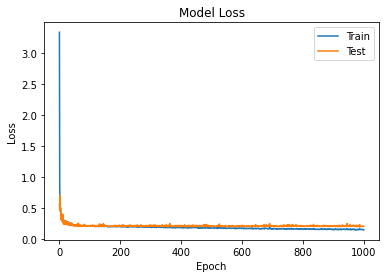

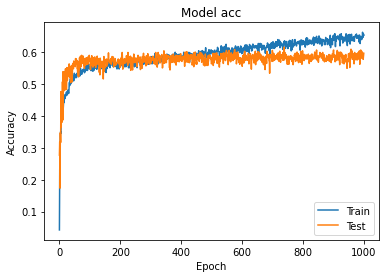

In [25]:

x_train, y_train, x_test, y_test = generate_data(white_wine, 0.8)

class DNN_Regressior(models.Model):
    def __init__(self, n_in, n_h, n_h2, n_h3, n_h4, n_h5, n_out):
        hidden = layers.Dense(n_h)
        hidden2 = layers.Dense(n_h2)
        hidden3 = layers.Dense(n_h3)
        hidden4 = layers.Dense(n_h4)
        hidden5 = layers.Dense(n_h5)
        output = layers.Dense(n_out)
        relu = layers.Activation('relu')
        sigmoid = layers.Activation('sigmoid')
        dropout_4 = layers.Dropout(0.48)
        dropout_2 = layers.Dropout(0.2)

        x = layers.Input(shape=(n_in,))
        h = relu(hidden(x))
        h = dropout_4(h)
        h = relu(hidden2(h))
        h = relu(hidden3(h)) 
        h = dropout_2(h)
        h = relu(hidden4(h))
        h = dropout_4(h)
        h = hidden5(h)
        y = output(h)

        adam = optimizers.Adam(lr=0.003, beta_1=0.8)

        super().__init__(x, y)

        self.compile(loss='logcosh', 
                    optimizer=adam,
                    metrics=['accuracy'])
        
n_in = 11
n_h = 212
n_h2 = 128
n_h3 = 64
n_h4 = 128
n_h5 = 256
n_out = 1

model = DNN_Regressior(n_in, n_h, n_h2, n_h3, n_h4, n_h5, n_out)

history = model.fit(x_train, y_train, epochs=1000, batch_size=500, validation_split=0.2, verbose=1)

performance_test = model.evaluate(x_test, y_test, batch_size=500)

print(f'\nTest Loss: {performance_test}')

plot_loss(history)
plt.show()
plot_acc(history)
plt.show()

### 3. 화이트 와인과 레드 와인을 하나의 모델만 사용하여 분류
* 화이트 와인과 레드 와인 데이터를 합쳐 wine 데이터 셋 생성
* 입력이 화이트 와인인지 레드 와인인지에 관계없이 와인 품질을 분류하는 모델 생성
* 모델의 성능을 향상시킬 수 있는 방법을 찾아 적용할 것


Train on 4157 samples, validate on 1040 samples
Epoch 1/1500
4157/4157 [==============================] - 1s 129us/step - loss: 1.6775 - accuracy: 0.3548 - val_loss: 1.2318 - val_accuracy: 0.4010
Epoch 2/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.3766 - accuracy: 0.3924 - val_loss: 1.2284 - val_accuracy: 0.4010
Epoch 3/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.3384 - accuracy: 0.4236 - val_loss: 1.2026 - val_accuracy: 0.4231
Epoch 4/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.3356 - accuracy: 0.4152 - val_loss: 1.2330 - val_accuracy: 0.4010
Epoch 5/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.3218 - accuracy: 0.4260 - val_loss: 1.2587 - val_accuracy: 0.4010
Epoch 6/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.3150 - accuracy: 0.4296 - val_loss: 1.2083 - val_accuracy: 0.4010
Epoch 7/1500
4157/4157 [==============================] - 0s 27us/ste

4157/4157 [==============================] - 0s 28us/step - loss: 1.2119 - accuracy: 0.4650 - val_loss: 1.1345 - val_accuracy: 0.5548
Epoch 57/1500
4157/4157 [==============================] - 0s 29us/step - loss: 1.2016 - accuracy: 0.4652 - val_loss: 1.1188 - val_accuracy: 0.5452
Epoch 58/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.1983 - accuracy: 0.4645 - val_loss: 1.1341 - val_accuracy: 0.4894
Epoch 59/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.1892 - accuracy: 0.4722 - val_loss: 1.1129 - val_accuracy: 0.4894
Epoch 60/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.1860 - accuracy: 0.4761 - val_loss: 1.1075 - val_accuracy: 0.5500
Epoch 61/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.1828 - accuracy: 0.4753 - val_loss: 1.1078 - val_accuracy: 0.5462
Epoch 62/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.1750 - accuracy: 0.4674 - val_loss: 1.0995 -

4157/4157 [==============================] - 0s 26us/step - loss: 1.1443 - accuracy: 0.5016 - val_loss: 1.0513 - val_accuracy: 0.5567
Epoch 112/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.1365 - accuracy: 0.5102 - val_loss: 1.0558 - val_accuracy: 0.5606
Epoch 113/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.1377 - accuracy: 0.5066 - val_loss: 1.0515 - val_accuracy: 0.5510
Epoch 114/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.1416 - accuracy: 0.4999 - val_loss: 1.0514 - val_accuracy: 0.5490
Epoch 115/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.1360 - accuracy: 0.5006 - val_loss: 1.0545 - val_accuracy: 0.5500
Epoch 116/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.1416 - accuracy: 0.5119 - val_loss: 1.0682 - val_accuracy: 0.5317
Epoch 117/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.1392 - accuracy: 0.5037 - val_loss: 1.

4157/4157 [==============================] - 0s 26us/step - loss: 1.1288 - accuracy: 0.5121 - val_loss: 1.0321 - val_accuracy: 0.5519
Epoch 167/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.1302 - accuracy: 0.5167 - val_loss: 1.0425 - val_accuracy: 0.5510
Epoch 168/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.1311 - accuracy: 0.5109 - val_loss: 1.0361 - val_accuracy: 0.5433
Epoch 169/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.1311 - accuracy: 0.5124 - val_loss: 1.0377 - val_accuracy: 0.5481
Epoch 170/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.1253 - accuracy: 0.5196 - val_loss: 1.0338 - val_accuracy: 0.5423
Epoch 171/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.1288 - accuracy: 0.5134 - val_loss: 1.0323 - val_accuracy: 0.5423
Epoch 172/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.1274 - accuracy: 0.5085 - val_loss: 1.

4157/4157 [==============================] - 0s 27us/step - loss: 1.1149 - accuracy: 0.5186 - val_loss: 1.0346 - val_accuracy: 0.5433
Epoch 222/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.1151 - accuracy: 0.5225 - val_loss: 1.0283 - val_accuracy: 0.5500
Epoch 223/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.1138 - accuracy: 0.5242 - val_loss: 1.0272 - val_accuracy: 0.5471
Epoch 224/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.1155 - accuracy: 0.5223 - val_loss: 1.0273 - val_accuracy: 0.5462
Epoch 225/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.1135 - accuracy: 0.5232 - val_loss: 1.0310 - val_accuracy: 0.5452
Epoch 226/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.1179 - accuracy: 0.5213 - val_loss: 1.0314 - val_accuracy: 0.5404
Epoch 227/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.1164 - accuracy: 0.5167 - val_loss: 1.

4157/4157 [==============================] - 0s 27us/step - loss: 1.1105 - accuracy: 0.5256 - val_loss: 1.0370 - val_accuracy: 0.5423
Epoch 277/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.1070 - accuracy: 0.5242 - val_loss: 1.0327 - val_accuracy: 0.5413
Epoch 278/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.1060 - accuracy: 0.5290 - val_loss: 1.0348 - val_accuracy: 0.5413
Epoch 279/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.1041 - accuracy: 0.5326 - val_loss: 1.0370 - val_accuracy: 0.5413
Epoch 280/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.1070 - accuracy: 0.5182 - val_loss: 1.0393 - val_accuracy: 0.5404
Epoch 281/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.1088 - accuracy: 0.5249 - val_loss: 1.0371 - val_accuracy: 0.5433
Epoch 282/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.1081 - accuracy: 0.5256 - val_loss: 1.

4157/4157 [==============================] - 0s 28us/step - loss: 1.1056 - accuracy: 0.5273 - val_loss: 1.0415 - val_accuracy: 0.5394
Epoch 332/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.1051 - accuracy: 0.5259 - val_loss: 1.0415 - val_accuracy: 0.5346
Epoch 333/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.1009 - accuracy: 0.5302 - val_loss: 1.0372 - val_accuracy: 0.5413
Epoch 334/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0999 - accuracy: 0.5295 - val_loss: 1.0395 - val_accuracy: 0.5385
Epoch 335/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.1010 - accuracy: 0.5328 - val_loss: 1.0402 - val_accuracy: 0.5385
Epoch 336/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.0991 - accuracy: 0.5360 - val_loss: 1.0365 - val_accuracy: 0.5471
Epoch 337/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.0973 - accuracy: 0.5324 - val_loss: 1.

4157/4157 [==============================] - 0s 27us/step - loss: 1.0968 - accuracy: 0.5309 - val_loss: 1.0343 - val_accuracy: 0.5404
Epoch 387/1500
4157/4157 [==============================] - 0s 29us/step - loss: 1.0935 - accuracy: 0.5295 - val_loss: 1.0342 - val_accuracy: 0.5433
Epoch 388/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.0906 - accuracy: 0.5401 - val_loss: 1.0354 - val_accuracy: 0.5394
Epoch 389/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.0945 - accuracy: 0.5304 - val_loss: 1.0342 - val_accuracy: 0.5394
Epoch 390/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.1001 - accuracy: 0.5384 - val_loss: 1.0349 - val_accuracy: 0.5423
Epoch 391/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0965 - accuracy: 0.5408 - val_loss: 1.0384 - val_accuracy: 0.5356
Epoch 392/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0965 - accuracy: 0.5367 - val_loss: 1.

4157/4157 [==============================] - 0s 27us/step - loss: 1.0920 - accuracy: 0.5372 - val_loss: 1.0382 - val_accuracy: 0.5500
Epoch 442/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0914 - accuracy: 0.5292 - val_loss: 1.0360 - val_accuracy: 0.5413
Epoch 443/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0893 - accuracy: 0.5362 - val_loss: 1.0357 - val_accuracy: 0.5433
Epoch 444/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0899 - accuracy: 0.5312 - val_loss: 1.0382 - val_accuracy: 0.5385
Epoch 445/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0873 - accuracy: 0.5408 - val_loss: 1.0337 - val_accuracy: 0.5452
Epoch 446/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0906 - accuracy: 0.5355 - val_loss: 1.0318 - val_accuracy: 0.5442
Epoch 447/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0896 - accuracy: 0.5319 - val_loss: 1.

4157/4157 [==============================] - 0s 26us/step - loss: 1.0869 - accuracy: 0.5319 - val_loss: 1.0306 - val_accuracy: 0.5394
Epoch 497/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0823 - accuracy: 0.5376 - val_loss: 1.0351 - val_accuracy: 0.5433
Epoch 498/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0904 - accuracy: 0.5348 - val_loss: 1.0337 - val_accuracy: 0.5481
Epoch 499/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0873 - accuracy: 0.5287 - val_loss: 1.0325 - val_accuracy: 0.5413
Epoch 500/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0837 - accuracy: 0.5403 - val_loss: 1.0313 - val_accuracy: 0.5375
Epoch 501/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0836 - accuracy: 0.5350 - val_loss: 1.0393 - val_accuracy: 0.5423
Epoch 502/1500
4157/4157 [==============================] - 0s 25us/step - loss: 1.0863 - accuracy: 0.5314 - val_loss: 1.

4157/4157 [==============================] - 0s 27us/step - loss: 1.0832 - accuracy: 0.5307 - val_loss: 1.0298 - val_accuracy: 0.5442
Epoch 552/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0811 - accuracy: 0.5376 - val_loss: 1.0382 - val_accuracy: 0.5365
Epoch 553/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0818 - accuracy: 0.5384 - val_loss: 1.0398 - val_accuracy: 0.5365
Epoch 554/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0847 - accuracy: 0.5287 - val_loss: 1.0350 - val_accuracy: 0.5423
Epoch 555/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0827 - accuracy: 0.5355 - val_loss: 1.0368 - val_accuracy: 0.5394
Epoch 556/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0818 - accuracy: 0.5422 - val_loss: 1.0349 - val_accuracy: 0.5413
Epoch 557/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0819 - accuracy: 0.5386 - val_loss: 1.

4157/4157 [==============================] - 0s 27us/step - loss: 1.0782 - accuracy: 0.5379 - val_loss: 1.0350 - val_accuracy: 0.5442
Epoch 607/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0823 - accuracy: 0.5352 - val_loss: 1.0352 - val_accuracy: 0.5490
Epoch 608/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0806 - accuracy: 0.5389 - val_loss: 1.0354 - val_accuracy: 0.5413
Epoch 609/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0787 - accuracy: 0.5417 - val_loss: 1.0393 - val_accuracy: 0.5385
Epoch 610/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0809 - accuracy: 0.5379 - val_loss: 1.0352 - val_accuracy: 0.5423
Epoch 611/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0798 - accuracy: 0.5401 - val_loss: 1.0396 - val_accuracy: 0.5462
Epoch 612/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0787 - accuracy: 0.5379 - val_loss: 1.

4157/4157 [==============================] - 0s 27us/step - loss: 1.0786 - accuracy: 0.5372 - val_loss: 1.0324 - val_accuracy: 0.5423
Epoch 662/1500
4157/4157 [==============================] - 0s 32us/step - loss: 1.0732 - accuracy: 0.5360 - val_loss: 1.0389 - val_accuracy: 0.5462
Epoch 663/1500
4157/4157 [==============================] - 0s 29us/step - loss: 1.0782 - accuracy: 0.5434 - val_loss: 1.0365 - val_accuracy: 0.5346
Epoch 664/1500
4157/4157 [==============================] - 0s 25us/step - loss: 1.0774 - accuracy: 0.5369 - val_loss: 1.0314 - val_accuracy: 0.5471
Epoch 665/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0771 - accuracy: 0.5415 - val_loss: 1.0355 - val_accuracy: 0.5433
Epoch 666/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0719 - accuracy: 0.5422 - val_loss: 1.0400 - val_accuracy: 0.5346
Epoch 667/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0815 - accuracy: 0.5360 - val_loss: 1.

4157/4157 [==============================] - 0s 26us/step - loss: 1.0717 - accuracy: 0.5487 - val_loss: 1.0363 - val_accuracy: 0.5433
Epoch 717/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.0742 - accuracy: 0.5374 - val_loss: 1.0411 - val_accuracy: 0.5404
Epoch 718/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0779 - accuracy: 0.5420 - val_loss: 1.0425 - val_accuracy: 0.5404
Epoch 719/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0742 - accuracy: 0.5408 - val_loss: 1.0377 - val_accuracy: 0.5404
Epoch 720/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0739 - accuracy: 0.5422 - val_loss: 1.0373 - val_accuracy: 0.5365
Epoch 721/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0744 - accuracy: 0.5398 - val_loss: 1.0389 - val_accuracy: 0.5385
Epoch 722/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0687 - accuracy: 0.5444 - val_loss: 1.

4157/4157 [==============================] - 0s 26us/step - loss: 1.0688 - accuracy: 0.5456 - val_loss: 1.0298 - val_accuracy: 0.5394
Epoch 772/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0757 - accuracy: 0.5350 - val_loss: 1.0351 - val_accuracy: 0.5346
Epoch 773/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0708 - accuracy: 0.5381 - val_loss: 1.0289 - val_accuracy: 0.5462
Epoch 774/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0696 - accuracy: 0.5408 - val_loss: 1.0280 - val_accuracy: 0.5510
Epoch 775/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0719 - accuracy: 0.5449 - val_loss: 1.0299 - val_accuracy: 0.5500
Epoch 776/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0711 - accuracy: 0.5415 - val_loss: 1.0328 - val_accuracy: 0.5471
Epoch 777/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0757 - accuracy: 0.5386 - val_loss: 1.

4157/4157 [==============================] - 0s 26us/step - loss: 1.0654 - accuracy: 0.5485 - val_loss: 1.0165 - val_accuracy: 0.5500
Epoch 827/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0626 - accuracy: 0.5475 - val_loss: 1.0260 - val_accuracy: 0.5442
Epoch 828/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0653 - accuracy: 0.5432 - val_loss: 1.0269 - val_accuracy: 0.5538
Epoch 829/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0659 - accuracy: 0.5410 - val_loss: 1.0178 - val_accuracy: 0.5596
Epoch 830/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0686 - accuracy: 0.5415 - val_loss: 1.0186 - val_accuracy: 0.5587
Epoch 831/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0669 - accuracy: 0.5369 - val_loss: 1.0183 - val_accuracy: 0.5567
Epoch 832/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0641 - accuracy: 0.5461 - val_loss: 1.

4157/4157 [==============================] - 0s 26us/step - loss: 1.0595 - accuracy: 0.5451 - val_loss: 1.0187 - val_accuracy: 0.5519
Epoch 882/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0585 - accuracy: 0.5437 - val_loss: 1.0150 - val_accuracy: 0.5529
Epoch 883/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0630 - accuracy: 0.5468 - val_loss: 1.0173 - val_accuracy: 0.5558
Epoch 884/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0609 - accuracy: 0.5465 - val_loss: 1.0216 - val_accuracy: 0.5567
Epoch 885/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0610 - accuracy: 0.5432 - val_loss: 1.0163 - val_accuracy: 0.5615
Epoch 886/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0663 - accuracy: 0.5369 - val_loss: 1.0195 - val_accuracy: 0.5654
Epoch 887/1500
4157/4157 [==============================] - 0s 35us/step - loss: 1.0574 - accuracy: 0.5458 - val_loss: 1.

4157/4157 [==============================] - 0s 27us/step - loss: 1.0573 - accuracy: 0.5511 - val_loss: 1.0223 - val_accuracy: 0.5519
Epoch 937/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0584 - accuracy: 0.5425 - val_loss: 1.0227 - val_accuracy: 0.5538
Epoch 938/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.0568 - accuracy: 0.5482 - val_loss: 1.0214 - val_accuracy: 0.5596
Epoch 939/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.0541 - accuracy: 0.5437 - val_loss: 1.0187 - val_accuracy: 0.5519
Epoch 940/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0505 - accuracy: 0.5511 - val_loss: 1.0211 - val_accuracy: 0.5529
Epoch 941/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0577 - accuracy: 0.5408 - val_loss: 1.0127 - val_accuracy: 0.5635
Epoch 942/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0596 - accuracy: 0.5439 - val_loss: 1.

4157/4157 [==============================] - 0s 27us/step - loss: 1.0531 - accuracy: 0.5557 - val_loss: 1.0183 - val_accuracy: 0.5702
Epoch 992/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.0515 - accuracy: 0.5499 - val_loss: 1.0204 - val_accuracy: 0.5625
Epoch 993/1500
4157/4157 [==============================] - 0s 29us/step - loss: 1.0560 - accuracy: 0.5415 - val_loss: 1.0163 - val_accuracy: 0.5538
Epoch 994/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0535 - accuracy: 0.5463 - val_loss: 1.0202 - val_accuracy: 0.5548
Epoch 995/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0519 - accuracy: 0.5458 - val_loss: 1.0229 - val_accuracy: 0.5644
Epoch 996/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0527 - accuracy: 0.5521 - val_loss: 1.0246 - val_accuracy: 0.5567
Epoch 997/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0510 - accuracy: 0.5482 - val_loss: 1.

Epoch 1046/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.0411 - accuracy: 0.5487 - val_loss: 1.0178 - val_accuracy: 0.5615
Epoch 1047/1500
4157/4157 [==============================] - 0s 30us/step - loss: 1.0464 - accuracy: 0.5492 - val_loss: 1.0309 - val_accuracy: 0.5490
Epoch 1048/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.0425 - accuracy: 0.5499 - val_loss: 1.0200 - val_accuracy: 0.5615
Epoch 1049/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0502 - accuracy: 0.5432 - val_loss: 1.0206 - val_accuracy: 0.5683
Epoch 1050/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0425 - accuracy: 0.5535 - val_loss: 1.0317 - val_accuracy: 0.5615
Epoch 1051/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.0466 - accuracy: 0.5504 - val_loss: 1.0179 - val_accuracy: 0.5692
Epoch 1052/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.0430 - accuracy:

4157/4157 [==============================] - 0s 27us/step - loss: 1.0392 - accuracy: 0.5547 - val_loss: 1.0162 - val_accuracy: 0.5587
Epoch 1101/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0466 - accuracy: 0.5478 - val_loss: 1.0112 - val_accuracy: 0.5712
Epoch 1102/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0424 - accuracy: 0.5461 - val_loss: 1.0146 - val_accuracy: 0.5663
Epoch 1103/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0421 - accuracy: 0.5429 - val_loss: 1.0159 - val_accuracy: 0.5644
Epoch 1104/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0448 - accuracy: 0.5425 - val_loss: 1.0243 - val_accuracy: 0.5615
Epoch 1105/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.0411 - accuracy: 0.5470 - val_loss: 1.0220 - val_accuracy: 0.5654
Epoch 1106/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0445 - accuracy: 0.5429 - val_lo

4157/4157 [==============================] - 0s 37us/step - loss: 1.0415 - accuracy: 0.5502 - val_loss: 1.0221 - val_accuracy: 0.5760
Epoch 1155/1500
4157/4157 [==============================] - 0s 37us/step - loss: 1.0379 - accuracy: 0.5651 - val_loss: 1.0251 - val_accuracy: 0.5615
Epoch 1156/1500
4157/4157 [==============================] - 0s 36us/step - loss: 1.0367 - accuracy: 0.5579 - val_loss: 1.0308 - val_accuracy: 0.5654
Epoch 1157/1500
4157/4157 [==============================] - 0s 32us/step - loss: 1.0422 - accuracy: 0.5485 - val_loss: 1.0285 - val_accuracy: 0.5673
Epoch 1158/1500
4157/4157 [==============================] - 0s 29us/step - loss: 1.0373 - accuracy: 0.5540 - val_loss: 1.0291 - val_accuracy: 0.5673
Epoch 1159/1500
4157/4157 [==============================] - 0s 40us/step - loss: 1.0386 - accuracy: 0.5603 - val_loss: 1.0282 - val_accuracy: 0.5712
Epoch 1160/1500
4157/4157 [==============================] - 0s 37us/step - loss: 1.0389 - accuracy: 0.5535 - val_lo

Epoch 1209/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0319 - accuracy: 0.5499 - val_loss: 1.0309 - val_accuracy: 0.5567
Epoch 1210/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0394 - accuracy: 0.5490 - val_loss: 1.0180 - val_accuracy: 0.5769
Epoch 1211/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0317 - accuracy: 0.5516 - val_loss: 1.0309 - val_accuracy: 0.5673
Epoch 1212/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0471 - accuracy: 0.5499 - val_loss: 1.0260 - val_accuracy: 0.5740
Epoch 1213/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0358 - accuracy: 0.5528 - val_loss: 1.0252 - val_accuracy: 0.5692
Epoch 1214/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0398 - accuracy: 0.5453 - val_loss: 1.0307 - val_accuracy: 0.5760
Epoch 1215/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0390 - accuracy:

4157/4157 [==============================] - 0s 27us/step - loss: 1.0307 - accuracy: 0.5530 - val_loss: 1.0227 - val_accuracy: 0.5683
Epoch 1264/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0400 - accuracy: 0.5545 - val_loss: 1.0215 - val_accuracy: 0.5731
Epoch 1265/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0336 - accuracy: 0.5504 - val_loss: 1.0236 - val_accuracy: 0.5683
Epoch 1266/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0343 - accuracy: 0.5516 - val_loss: 1.0180 - val_accuracy: 0.5663
Epoch 1267/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0374 - accuracy: 0.5463 - val_loss: 1.0217 - val_accuracy: 0.5808
Epoch 1268/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0362 - accuracy: 0.5504 - val_loss: 1.0200 - val_accuracy: 0.5654
Epoch 1269/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0364 - accuracy: 0.5552 - val_lo

Epoch 1318/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0339 - accuracy: 0.5612 - val_loss: 1.0269 - val_accuracy: 0.5731
Epoch 1319/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0362 - accuracy: 0.5492 - val_loss: 1.0231 - val_accuracy: 0.5750
Epoch 1320/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0274 - accuracy: 0.5567 - val_loss: 1.0412 - val_accuracy: 0.5654
Epoch 1321/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0329 - accuracy: 0.5499 - val_loss: 1.0317 - val_accuracy: 0.5760
Epoch 1322/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0327 - accuracy: 0.5571 - val_loss: 1.0324 - val_accuracy: 0.5673
Epoch 1323/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0310 - accuracy: 0.5615 - val_loss: 1.0333 - val_accuracy: 0.5663
Epoch 1324/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0273 - accuracy:

4157/4157 [==============================] - 0s 27us/step - loss: 1.0263 - accuracy: 0.5559 - val_loss: 1.0241 - val_accuracy: 0.5750
Epoch 1373/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0255 - accuracy: 0.5545 - val_loss: 1.0367 - val_accuracy: 0.5663
Epoch 1374/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0268 - accuracy: 0.5559 - val_loss: 1.0321 - val_accuracy: 0.5683
Epoch 1375/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.0229 - accuracy: 0.5576 - val_loss: 1.0495 - val_accuracy: 0.5683
Epoch 1376/1500
4157/4157 [==============================] - 0s 30us/step - loss: 1.0288 - accuracy: 0.5550 - val_loss: 1.0474 - val_accuracy: 0.5644
Epoch 1377/1500
4157/4157 [==============================] - 0s 29us/step - loss: 1.0221 - accuracy: 0.5574 - val_loss: 1.0412 - val_accuracy: 0.5625
Epoch 1378/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0280 - accuracy: 0.5530 - val_lo

Epoch 1427/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0241 - accuracy: 0.5583 - val_loss: 1.0296 - val_accuracy: 0.5692
Epoch 1428/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0254 - accuracy: 0.5576 - val_loss: 1.0356 - val_accuracy: 0.5702
Epoch 1429/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0254 - accuracy: 0.5550 - val_loss: 1.0451 - val_accuracy: 0.5673
Epoch 1430/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0249 - accuracy: 0.5547 - val_loss: 1.0368 - val_accuracy: 0.5721
Epoch 1431/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0251 - accuracy: 0.5540 - val_loss: 1.0303 - val_accuracy: 0.5692
Epoch 1432/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0275 - accuracy: 0.5526 - val_loss: 1.0258 - val_accuracy: 0.5692
Epoch 1433/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0253 - accuracy:

4157/4157 [==============================] - 0s 26us/step - loss: 1.0249 - accuracy: 0.5588 - val_loss: 1.0331 - val_accuracy: 0.5740
Epoch 1482/1500
4157/4157 [==============================] - 0s 26us/step - loss: 1.0259 - accuracy: 0.5627 - val_loss: 1.0457 - val_accuracy: 0.5635
Epoch 1483/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.0309 - accuracy: 0.5588 - val_loss: 1.0500 - val_accuracy: 0.5702
Epoch 1484/1500
4157/4157 [==============================] - 0s 28us/step - loss: 1.0200 - accuracy: 0.5533 - val_loss: 1.0441 - val_accuracy: 0.5635
Epoch 1485/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0277 - accuracy: 0.5598 - val_loss: 1.0348 - val_accuracy: 0.5644
Epoch 1486/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0244 - accuracy: 0.5571 - val_loss: 1.0354 - val_accuracy: 0.5702
Epoch 1487/1500
4157/4157 [==============================] - 0s 27us/step - loss: 1.0252 - accuracy: 0.5574 - val_lo

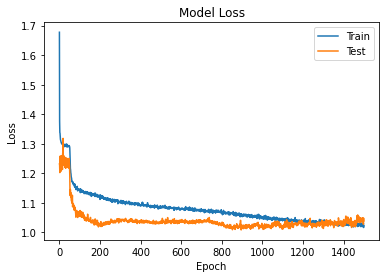

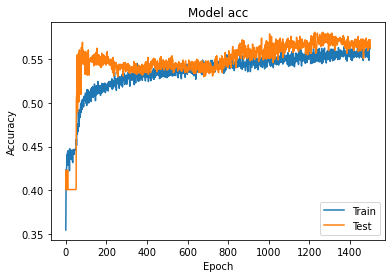

In [12]:
##########################################################
x_train_red, y_train_red, x_test_red, y_test_red = generate_data(red_wine, 0.8)
y_train_red = one_hot_enc(y_train_red)
y_test_red = one_hot_enc(y_test_red)

x_train = np.append(x_train, x_train_red, axis=0)
y_train = np.append(y_train, y_train_red, axis=0)
x_test = np.append(x_test, x_test_red, axis=0)
y_test = np.append(y_test, y_test_red, axis=0)

model = DNN(n_in, n_h, n_h2, n_h3, n_h4, n_h5, n_h6, n_h7, n_h8, n_h9, n_out)

history = model.fit(x_train, y_train, epochs=1500,
                    batch_size=BATCH_SIZE, validation_split=0.2,
                    verbose=1)

performance_test = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)

print(f'\nTest Loss: {performance_test}')

plot_loss(history)
plt.show()
plot_acc(history)
plt.show()
###########################################################